1. Data Loading and Preprocessing


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df = pd.read_csv('yield_df.csv')
df.drop(['Unnamed: 0'], axis=1 , inplace=True)
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


dataset's characteristics

In [4]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


3.Identifying Unique Entities


In [5]:
df['Area'].nunique()


101

In [6]:
df['Item'].nunique()


10

In [7]:
df['Year'].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013])

4.Analyzing Production Rates


In [8]:
# The highest and the lowest production rate
df['hg/ha_yield'].agg([np.max , np.min])


C:\Users\mahid\AppData\Local\Temp\ipykernel_18692\2046204179.py:2: FutureWarning: The provided callable <function max at 0x00000118EAAA00E0> is currently using Series.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df['hg/ha_yield'].agg([np.max , np.min])
C:\Users\mahid\AppData\Local\Temp\ipykernel_18692\2046204179.py:2: FutureWarning: The provided callable <function min at 0x00000118EAAA0220> is currently using Series.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  df['hg/ha_yield'].agg([np.max , np.min])


max    501412
min        50
Name: hg/ha_yield, dtype: int64

In [9]:
# Area with highest production rate
df[df['hg/ha_yield'] == df['hg/ha_yield'].max() ]['Area']

2470    Belgium
Name: Area, dtype: object

In [10]:
# Area with lowest production rate
df[df['hg/ha_yield'] == df['hg/ha_yield'].min() ] ['Area']

26174    Tajikistan
Name: Area, dtype: object

In [11]:
# Year with highest production rate
df[df['hg/ha_yield'] == df['hg/ha_yield'].max() ]['Year']

2470    2011
Name: Year, dtype: int64

In [12]:
# Year with lowest production rate
df[df['hg/ha_yield'] == df['hg/ha_yield'].min() ] ['Year']

26174    1992
Name: Year, dtype: int64

5.Environmental Factors


In [13]:
# Area with highest Temperature
df.groupby('Area')['avg_temp'].max().sort_values(ascending = False).head(1)

Area
Sudan    30.65
Name: avg_temp, dtype: float64

In [14]:
# Area with lowest Temperature
df.groupby('Area')['avg_temp'].max().sort_values(ascending = True).head(1)

Area
Norway    4.55
Name: avg_temp, dtype: float64

In [15]:
# The most productive crop
df[df['hg/ha_yield'] == df['hg/ha_yield'].max() ]['Item']

2470    Potatoes
Name: Item, dtype: object

In [16]:
# The least productive crop
df[df['hg/ha_yield'] == df['hg/ha_yield'].min() ]['Item']

26174    Soybeans
Name: Item, dtype: object

In [17]:
# Area with highest rainfall
#df[df['average_rain_fall_mm_per_year'] == df['average_rain_fall_mm_per_year'].max()]
df.groupby('Area')['average_rain_fall_mm_per_year'].max().sort_values(ascending = False).head(1)

Area
Colombia    3240.0
Name: average_rain_fall_mm_per_year, dtype: float64

In [18]:
# Area with lowest rainfall
#df[df['average_rain_fall_mm_per_year'] == df['average_rain_fall_mm_per_year'].min()]
df.groupby('Area')['average_rain_fall_mm_per_year'].min().sort_values(ascending = True).head(1)


Area
Egypt    51.0
Name: average_rain_fall_mm_per_year, dtype: float64

Data Visualization

Correlation Analysis:
The relationship between temperature and crop yield, as well as rainfall and crop yield, is visually represented using scatter plots. Correlation coefficients are computed to quantify the strength of these relationships.

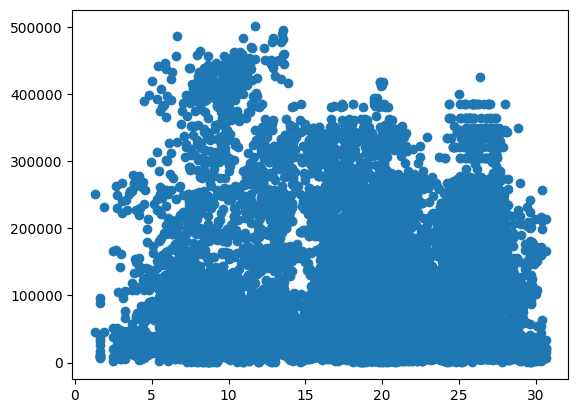

In [19]:
plt.scatter(x= 'avg_temp' , y= 'hg/ha_yield' , data = df)
plt.show()

In [20]:
df_rain_prod = df[['average_rain_fall_mm_per_year' , 'hg/ha_yield']]
df_rain_prod.corr(method = 'pearson')

,average_rain_fall_mm_per_year,hg/ha_yield
average_rain_fall_mm_per_year,1.000000,0.000962
hg/ha_yield,0.000962,1.000000


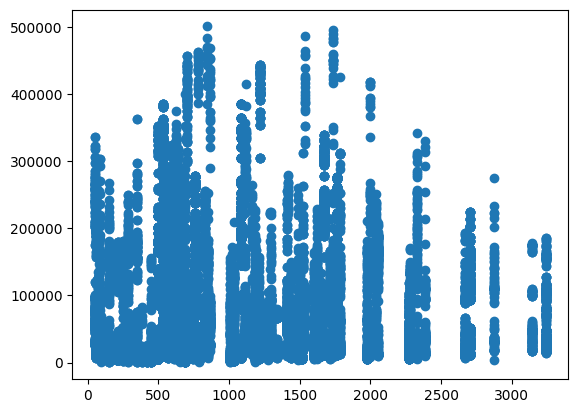

In [21]:
plt.scatter(x = 'average_rain_fall_mm_per_year' , y= 'hg/ha_yield' , data = df)
plt.show()

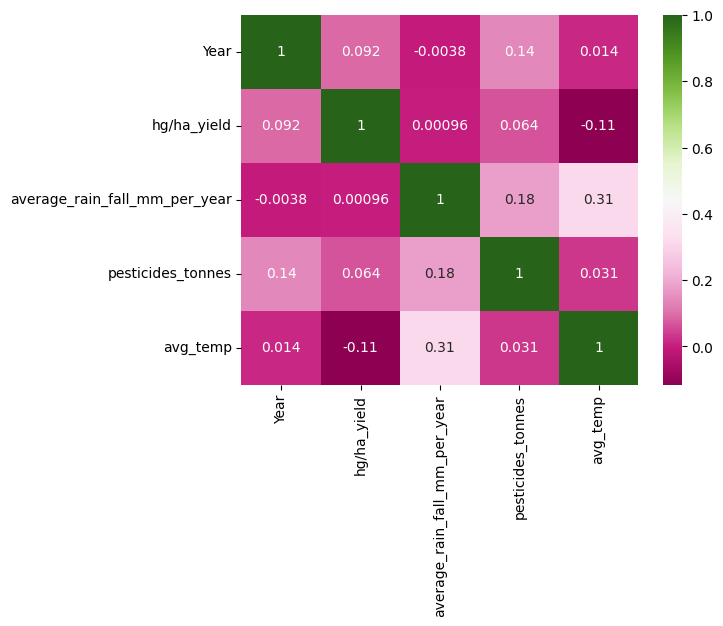

In [22]:
# Select only numerical features for correlation analysis
numerical_features = df.select_dtypes(include=['number'])

# Calculate the correlation matrix for numerical features
correlation_matrix = numerical_features.corr()

# Generate the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='PiYG')
plt.show()